<a href="https://colab.research.google.com/github/vunnampragathi/projects/blob/main/src/ml_models_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 
from sklearn.metrics import accuracy_score, confusion_matrix
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [3]:
COL_LIST = ['State','Date Local','NO2 AQI','NO2 Mean','O3 AQI','O3 Mean','CO AQI','CO Mean','SO2 AQI','SO2 Mean']

In [4]:
data = pd.read_csv("/content/uspollution_pollution_us_2000_2016.csv",usecols =COL_LIST )

In [5]:
data

,State,Date Local,NO2 Mean,NO2 AQI,O3 Mean,O3 AQI,SO2 Mean,SO2 AQI,CO Mean,CO AQI
0,Arizona,2000-01-01,19.041667,46.0,0.022500,34.0,3.000000,13.0,1.145833,NaN
1,Arizona,2000-01-01,19.041667,46.0,0.022500,34.0,3.000000,13.0,0.878947,25.0
2,Arizona,2000-01-01,19.041667,46.0,0.022500,34.0,2.975000,NaN,1.145833,NaN
3,Arizona,2000-01-01,19.041667,46.0,0.022500,34.0,2.975000,NaN,0.878947,25.0
4,Arizona,2000-01-02,22.958333,34.0,0.013375,27.0,1.958333,4.0,0.850000,NaN
...,...,...,...,...,...,...,...,...,...,...
1248444,Connecticut,2012-02-05,0.458333,1.0,0.035375,31.0,0.358333,0.0,0.134783,NaN
1248445,Connecticut,2012-02-05,0.458333,1.0,0.035375,31.0,0.358333,0.0,0.100000,1.0
1248446,Connecticut,2012-02-05,0.458333,1.0,0.035375,31.0,0.337500,NaN,0.134783,NaN
1248447,Connecticut,2012-02-05,0.458333,1.0,0.035375,31.0,0.337500,NaN,0.100000,1.0


In [6]:
df=data.fillna(method='ffill')
df

,State,Date Local,NO2 Mean,NO2 AQI,O3 Mean,O3 AQI,SO2 Mean,SO2 AQI,CO Mean,CO AQI
0,Arizona,2000-01-01,19.041667,46.0,0.022500,34.0,3.000000,13.0,1.145833,NaN
1,Arizona,2000-01-01,19.041667,46.0,0.022500,34.0,3.000000,13.0,0.878947,25.0
2,Arizona,2000-01-01,19.041667,46.0,0.022500,34.0,2.975000,13.0,1.145833,25.0
3,Arizona,2000-01-01,19.041667,46.0,0.022500,34.0,2.975000,13.0,0.878947,25.0
4,Arizona,2000-01-02,22.958333,34.0,0.013375,27.0,1.958333,4.0,0.850000,25.0
...,...,...,...,...,...,...,...,...,...,...
1248444,Connecticut,2012-02-05,0.458333,1.0,0.035375,31.0,0.358333,0.0,0.134783,2.0
1248445,Connecticut,2012-02-05,0.458333,1.0,0.035375,31.0,0.358333,0.0,0.100000,1.0
1248446,Connecticut,2012-02-05,0.458333,1.0,0.035375,31.0,0.337500,0.0,0.134783,1.0
1248447,Connecticut,2012-02-05,0.458333,1.0,0.035375,31.0,0.337500,0.0,0.100000,1.0


In [7]:
df=df.fillna(method='bfill')

In [8]:
df

,State,Date Local,NO2 Mean,NO2 AQI,O3 Mean,O3 AQI,SO2 Mean,SO2 AQI,CO Mean,CO AQI
0,Arizona,2000-01-01,19.041667,46.0,0.022500,34.0,3.000000,13.0,1.145833,25.0
1,Arizona,2000-01-01,19.041667,46.0,0.022500,34.0,3.000000,13.0,0.878947,25.0
2,Arizona,2000-01-01,19.041667,46.0,0.022500,34.0,2.975000,13.0,1.145833,25.0
3,Arizona,2000-01-01,19.041667,46.0,0.022500,34.0,2.975000,13.0,0.878947,25.0
4,Arizona,2000-01-02,22.958333,34.0,0.013375,27.0,1.958333,4.0,0.850000,25.0
...,...,...,...,...,...,...,...,...,...,...
1248444,Connecticut,2012-02-05,0.458333,1.0,0.035375,31.0,0.358333,0.0,0.134783,2.0
1248445,Connecticut,2012-02-05,0.458333,1.0,0.035375,31.0,0.358333,0.0,0.100000,1.0
1248446,Connecticut,2012-02-05,0.458333,1.0,0.035375,31.0,0.337500,0.0,0.134783,1.0
1248447,Connecticut,2012-02-05,0.458333,1.0,0.035375,31.0,0.337500,0.0,0.100000,1.0


In [9]:
df1=df.loc[df['State'] == "California"]

In [10]:
df1

,State,Date Local,NO2 Mean,NO2 AQI,O3 Mean,O3 AQI,SO2 Mean,SO2 AQI,CO Mean,CO AQI
3516,California,2000-01-01,14.782609,25.0,0.015542,25.0,0.636364,3.0,0.556522,22.0
3517,California,2000-01-01,14.782609,25.0,0.015542,25.0,0.636364,3.0,0.572222,9.0
3518,California,2000-01-01,14.782609,25.0,0.015542,25.0,0.600000,3.0,0.556522,9.0
3519,California,2000-01-01,14.782609,25.0,0.015542,25.0,0.600000,3.0,0.572222,9.0
3520,California,2000-01-02,16.043478,28.0,0.015292,27.0,1.000000,3.0,0.578261,9.0
...,...,...,...,...,...,...,...,...,...,...
1244187,California,2012-12-30,19.004348,33.0,0.007042,16.0,1.085714,1.0,1.116667,19.0
1244188,California,2012-12-31,25.230435,34.0,0.011632,21.0,1.386364,3.0,0.800000,19.0
1244189,California,2012-12-31,25.230435,34.0,0.011632,21.0,1.386364,3.0,0.833333,15.0
1244190,California,2012-12-31,25.230435,34.0,0.011632,21.0,1.385714,3.0,0.800000,15.0


In [11]:
df1.drop_duplicates(subset=['Date Local'], inplace=True)    # deleting the repeated date local values
df1

,State,Date Local,NO2 Mean,NO2 AQI,O3 Mean,O3 AQI,SO2 Mean,SO2 AQI,CO Mean,CO AQI
3516,California,2000-01-01,14.782609,25.0,0.015542,25.0,0.636364,3.0,0.556522,22.0
3520,California,2000-01-02,16.043478,28.0,0.015292,27.0,1.000000,3.0,0.578261,9.0
3524,California,2000-01-03,25.521739,38.0,0.005625,12.0,2.454545,6.0,1.313043,9.0
3528,California,2000-01-04,26.041667,42.0,0.006083,9.0,1.541667,6.0,1.187500,22.0
3532,California,2000-01-05,23.772727,36.0,0.010500,19.0,1.681818,6.0,1.136364,23.0
...,...,...,...,...,...,...,...,...,...,...
1212744,California,2012-01-21,4.017391,13.0,0.027583,31.0,0.000000,0.0,0.230435,7.0
1212748,California,2012-01-22,7.282609,14.0,0.023292,27.0,0.218182,0.0,0.260870,3.0
1212752,California,2012-01-23,8.534783,17.0,0.013958,25.0,0.018182,0.0,0.347826,3.0
1212756,California,2012-01-24,11.568182,20.0,0.010208,15.0,0.166667,0.0,0.372727,6.0


The pollutant with the highest AQI value determines the overall AQI for that hour.

ref:https://www.pca.state.mn.us/air-water-land-climate/understanding-the-air-quality-index-aqi#:~:text=The%20AQI%20is%20calculated%20by,National%20Ambient%20Air%20Quality%20Standards.

In [12]:
df1["AQI"] = df1.max(axis=1)
df1

,State,Date Local,NO2 Mean,NO2 AQI,O3 Mean,O3 AQI,SO2 Mean,SO2 AQI,CO Mean,CO AQI,AQI
3516,California,2000-01-01,14.782609,25.0,0.015542,25.0,0.636364,3.0,0.556522,22.0,25.0
3520,California,2000-01-02,16.043478,28.0,0.015292,27.0,1.000000,3.0,0.578261,9.0,28.0
3524,California,2000-01-03,25.521739,38.0,0.005625,12.0,2.454545,6.0,1.313043,9.0,38.0
3528,California,2000-01-04,26.041667,42.0,0.006083,9.0,1.541667,6.0,1.187500,22.0,42.0
3532,California,2000-01-05,23.772727,36.0,0.010500,19.0,1.681818,6.0,1.136364,23.0,36.0
...,...,...,...,...,...,...,...,...,...,...,...
1212744,California,2012-01-21,4.017391,13.0,0.027583,31.0,0.000000,0.0,0.230435,7.0,31.0
1212748,California,2012-01-22,7.282609,14.0,0.023292,27.0,0.218182,0.0,0.260870,3.0,27.0
1212752,California,2012-01-23,8.534783,17.0,0.013958,25.0,0.018182,0.0,0.347826,3.0,25.0
1212756,California,2012-01-24,11.568182,20.0,0.010208,15.0,0.166667,0.0,0.372727,6.0,20.0


In [13]:
def AQI_Range(x):
  if x<=50:
    return "Good"
  elif x>50 and x<=100:return "Moderate"
  elif x>100 and x<=200:return "Poor"
  elif x>200 and x<=300:return "Unhealthy"
  elif x>300 and x<=400:return "Very unhealthy"
  elif x>400:return "Hazardous"
df1['AQI Range'] = df1['AQI'] .apply(AQI_Range)
df1.head()

,State,Date Local,NO2 Mean,NO2 AQI,O3 Mean,O3 AQI,SO2 Mean,SO2 AQI,CO Mean,CO AQI,AQI,AQI Range
3516,California,2000-01-01,14.782609,25.0,0.015542,25.0,0.636364,3.0,0.556522,22.0,25.0,Good
3520,California,2000-01-02,16.043478,28.0,0.015292,27.0,1.000000,3.0,0.578261,9.0,28.0,Good
3524,California,2000-01-03,25.521739,38.0,0.005625,12.0,2.454545,6.0,1.313043,9.0,38.0,Good
3528,California,2000-01-04,26.041667,42.0,0.006083,9.0,1.541667,6.0,1.187500,22.0,42.0,Good
3532,California,2000-01-05,23.772727,36.0,0.010500,19.0,1.681818,6.0,1.136364,23.0,36.0,Good


In [53]:
x=df1[['NO2 AQI','O3 AQI','SO2 AQI','CO AQI']]
y=df1[['AQI']]
x.head()

,NO2 AQI,O3 AQI,SO2 AQI,CO AQI
3516,25.0,25.0,3.0,22.0
3520,28.0,27.0,3.0,9.0
3524,38.0,12.0,6.0,9.0
3528,42.0,9.0,6.0,22.0
3532,36.0,19.0,6.0,23.0


In [54]:
y.head()

,AQI
3516,25.0
3520,28.0
3524,38.0
3528,42.0
3532,36.0


In [55]:
X_train,X_test,Y_train,Y_test=train_test_split(x, y, test_size=0.2, random_state=70)
print(X_train.shape, X_test. shape,Y_train. shape, Y_test.shape)
#splitting the data into training and testing data

(3799, 4) (950, 4) (3799, 1) (950, 1)


# linear regression

In [17]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [18]:

test_pred=model.predict(X_test)

In [19]:

RMSE_test =(np.sqrt(metrics.mean_squared_error(Y_test, test_pred))) 
print("RMSE TestData= ", str(RMSE_test))


RMSE TestData=  4.901742420248481


# logistic Regression

In [20]:
model=LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [21]:

test_pred=model.predict(X_test)

In [22]:

RMSE_test =(np.sqrt(metrics.mean_squared_error(Y_test, test_pred))) 
print("RMSE TestData= ", str(RMSE_test))

RMSE TestData=  10.821421251145194


# Decision Tree Regressor

In [23]:
DT=DecisionTreeRegressor()
DT.fit(X_train,Y_train)

DecisionTreeRegressor()

In [24]:

test_pred=DT.predict(X_test)

In [25]:

RMSE_test =(np.sqrt(metrics.mean_squared_error(Y_test, test_pred))) 
print("RMSE TestData=",str(RMSE_test))

RMSE TestData= 0.5360675526952099


# Random Forest Regressor

In [56]:
RF=RandomForestRegressor()
RF.fit(X_train,Y_train)
test_pred=RF.predict(X_test)

In [57]:

RMSE_test= (np.sqrt(metrics.mean_squared_error(Y_test, test_pred)))
print("RMSE TestData=", str(RMSE_test))


RMSE TestData= 0.6073509347113387


# ARIMA

In [30]:

new=['Date Local','AQI']
df2=df1[new]
df2

,Date Local,AQI
3516,2000-01-01,25.0
3520,2000-01-02,28.0
3524,2000-01-03,38.0
3528,2000-01-04,42.0
3532,2000-01-05,36.0
...,...,...
1212744,2012-01-21,31.0
1212748,2012-01-22,27.0
1212752,2012-01-23,25.0
1212756,2012-01-24,20.0


In [31]:


df3=df2.set_index('Date Local')
df3=df3[["AQI"]]
df3

,AQI
Date Local,
2000-01-01,25.0
2000-01-02,28.0
2000-01-03,38.0
2000-01-04,42.0
2000-01-05,36.0
...,...
2012-01-21,31.0
2012-01-22,27.0
2012-01-23,25.0


In [34]:
stat_test = adfuller(df3['AQI'])
print('The test statistic for AQI is {} and p-value is {}'.format(stat_test[0], stat_test[1]))

The test statistic for AQI is -6.579136243828951 and p-value is 7.59178519641001e-09


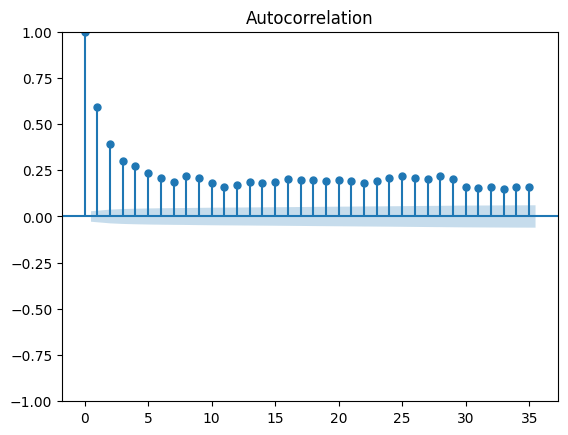

In [35]:
sm.graphics.tsa.plot_acf(df3['AQI'], lags=35);

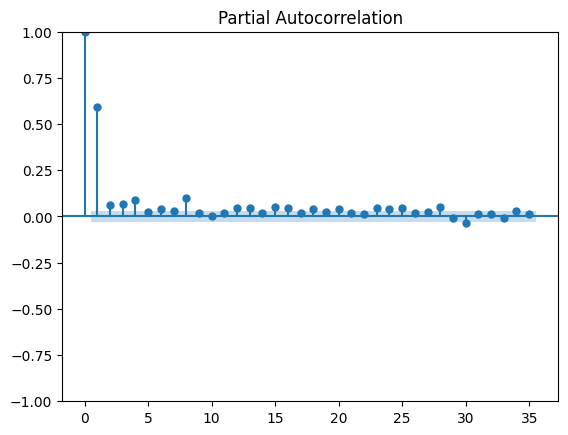

In [36]:
sm.graphics.tsa.plot_pacf(df3['AQI'], lags=35);
     

In [37]:
train_len = int(len(df3['AQI']) * 0.8)
df_train = df3[:train_len]
df_test = df3['AQI'][train_len:]
start = len(df_train)
end = len(df_train) + len(df_test) - 1

In [38]:
ma_model = ARIMA(df_train, order=(0, 0, 5))
ma_result = ma_model.fit()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels

In [39]:
ma_pred = ma_result.predict(start, end)
rmse_ma = np.sqrt(mean_squared_error(df_test, ma_pred))
print("rmse:",rmse_ma)

rmse: 9.48213836908


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


moving average prediction of 


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.9/dist-packages/matplotlib/pyplot.py'>

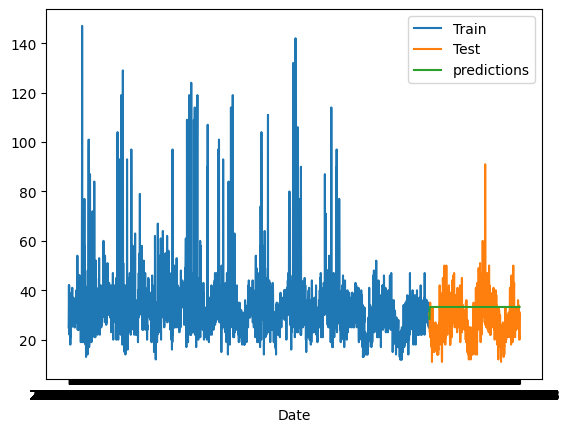

In [40]:

ma_pred.index = df_test.index
plt.plot(df_train.index, df_train, label='Train')
plt.plot(df_test.index, df_test, label='Test')
plt.plot(ma_pred.index , ma_pred, label='predictions')
print('moving average prediction of ')
    
plt.legend()
plt.xlabel('Date')
plt
    

In [41]:
ar_model = ARIMA(df_train, order=(5, 0, 0))
ar_result = ar_model.fit()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels

In [42]:
ar_pred = ar_result.predict(start, end)
rmse_ar = np.sqrt(mean_squared_error(df_test, ar_pred))
print("rmse:",rmse_ar)

rmse: 9.477524374523341


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [43]:
arima_model = ARIMA(df_train, order=(5, 1, 8))
arima_result = arima_model.fit()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels

In [44]:
arima_pred = arima_result.predict(start, end)
rmse_arima = np.sqrt(mean_squared_error(df_test, arima_pred))
print("rmse:",rmse_arima)

rmse: 7.997105520638304


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


ARIMA prediction of AQI


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.9/dist-packages/matplotlib/pyplot.py'>

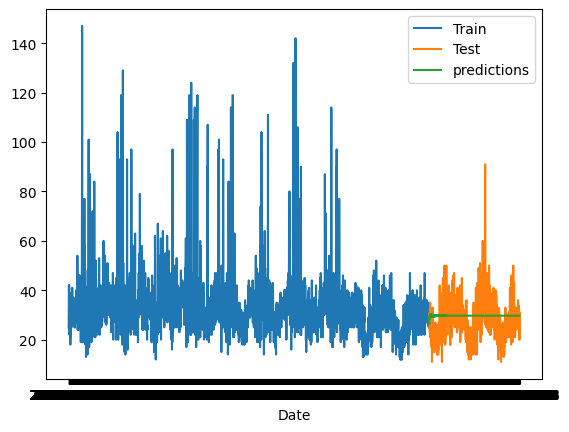

In [67]:
arima_pred.index = df_test.index
plt.plot(df_train.index, df_train, label='Train')
plt.plot(df_test.index, df_test, label='Test')
plt.plot(arima_pred.index , arima_pred, label='predictions')
print('ARIMA prediction of AQI')
    
plt.legend()
plt.xlabel('Date')
plt